In [1]:
import pandas as pd

In [2]:
datos=pd.read_csv("Transmitancia_VeMN7_5g_limpio.csv")

In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   nm      361 non-null    float64
 1   %T      353 non-null    float64
dtypes: float64(2)
memory usage: 5.8 KB


In [4]:
datos.head()

,nm,%T
0,390.0,NaN
1,391.0,NaN
2,392.0,NaN
3,393.0,NaN
4,394.0,52.13


In [5]:
x=datos["nm"]

In [8]:
y=datos["%T"]

In [9]:
x

0      390.0
1      391.0
2      392.0
3      393.0
4      394.0
       ...  
356    746.0
357    747.0
358    748.0
359    749.0
360    750.0
Name: nm, Length: 361, dtype: float64

In [10]:
y

0         NaN
1         NaN
2         NaN
3         NaN
4      52.130
        ...  
356    93.833
357       NaN
358       NaN
359       NaN
360       NaN
Name: %T, Length: 361, dtype: float64

<Axes: xlabel='nm', ylabel='%T'>

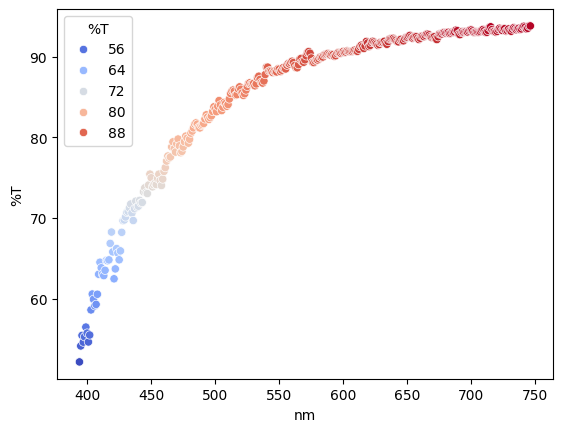

In [11]:
import seaborn as sb
sb.scatterplot(x=x,y=y, data=datos, hue=y, palette="coolwarm")

In [12]:
from scipy.signal import savgol_filter
import seaborn as sb
import matplotlib.pyplot as plt


In [13]:
#Creamos una columna suavizada
datos["T_suavizada"]=savgol_filter(datos["%T"], window_length=19, polyorder=3)

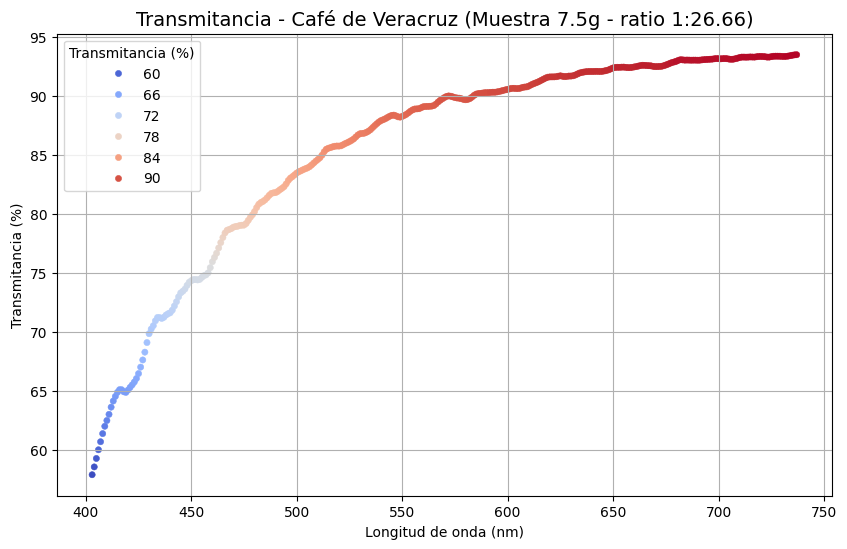

In [14]:
#Graficamos el scatterplot con suavizado y gradiente de color
plt.figure(figsize=(10,6))
sb.scatterplot(x=x, y="T_suavizada", data=datos, hue="T_suavizada", palette="coolwarm", s=20, edgecolor=None)
plt.title("Transmitancia - Café de Veracruz (Muestra 7.5g - ratio 1:26.66)", fontsize=14)
plt.xlabel("Longitud de onda (nm)")
plt.ylabel("Transmitancia (%)")
plt.legend(title="Transmitancia (%)", loc='best')
plt.grid(True)
plt.show()